## Análisis de la variacián antes y después de la publicación de la tasa de interes.

**@author:** Carlos Enrique Muniz Cuza

**@date:** Noviembre 11, 2022

Este notebook presenta un análisis de la distribución de la variación diaria promedio de la tasa de cambio de ElToque (ET). La variación diaria promedio (VDP) no es más que la diferencia de los valores promedios diarios. El objetivo es argumentar en favor de la idea de que si bien la publicación de la tasa referencial de ET puede influir levemente, esa influencia no condiciona el comportamiento del mercado. La principal hipótesis es que la distribución VDP de la tasa de cambio se comporta igual antes y después de la publicación de la tasa referencial de ET. Como parte del análisis hacemos las siguientes tareas:

1. Análisis del coeficiente de varianción (CV) de VDP: El CV es una medida estadística de la dispersión de puntos de datos alrededor de la media. Su análisis nos ayudará a entender si existe diferencia entre los datos colectados en el pasado y los actuales.
    
2. Prueba de hipótesis de Kolmogorov-Smirnov (KS): Usamos KS para verificar si efectivamente la distribución de probabilidad antes y después de la tasa de ET han cambiado. 

3. Análisis del índice de estabilidad de la población (IEP): IEP mide cuánto se ha desplazado una variable entre dos distribuciones. Por tanto, lo usamos para medir si ha habido un cambio en la distribución de VDP. 

### Datos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_excel('./all_days_stats_by_currencies.xlsx')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)
df.sort_index(inplace=True)
df.head(5)

,Moneda,Id,Oferta
Fecha,,,
2021-01-02 13:00:02,USD,61acb42dab932e127b42177e,50.0
2021-01-07 19:12:15,USD,61acb883bc2bca1ccad3d63d,49.0
2021-01-09 03:15:10,USD,61acb948bc2bca1ccad3d7a5,40.0
2021-01-10 20:44:38,USD,61acba13bc2bca1ccad3d92f,37.5
2021-01-14 20:04:20,USD,61acb241ab932e127b4212c9,42.0


#### Ahora, por cada moneda, calculemos la media diaria. 

In [2]:
def get_lower_upper_bond(values):
    q1 = np.quantile(values, 0.25)
    q3 = np.quantile(values, 0.75)
    
    lower_iqd = q1 - 1.5*(q3-q1)
    upper_iqd = q3 + 1.5*(q3-q1)
    
    return lower_iqd, upper_iqd
    

def get_mean_without_outliers(ti):
    if ti.values.shape[0] < 1:
        return np.NaN
    
    lower_iqd, upper_iqd = get_lower_upper_bond(ti.values)
    
    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]
    
    return new_ti.mean()

def get_median_without_outliers(ti):
    if ti.values.shape[0] < 1:
        return np.NaN
    
    lower_iqd, upper_iqd = get_lower_upper_bond(ti.values)
    
    new_ti = ti[(ti>=lower_iqd) & (ti<=upper_iqd)]
    
    return new_ti.median()
    

daily_mean = df.groupby('Moneda').resample('d').agg({'Oferta':get_mean_without_outliers})
daily_median = df.groupby('Moneda').resample('d').agg({'Oferta':get_median_without_outliers})

#### Visualizemos la diferencia de la media diaria para el Euro antes y durante del 2022

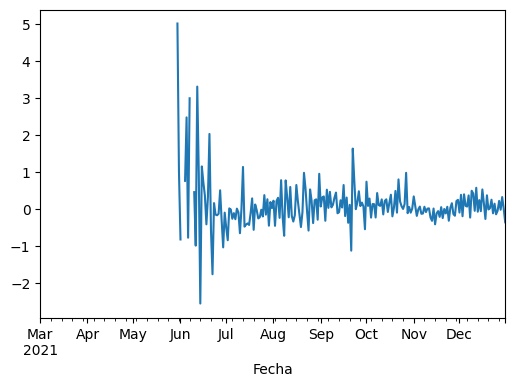

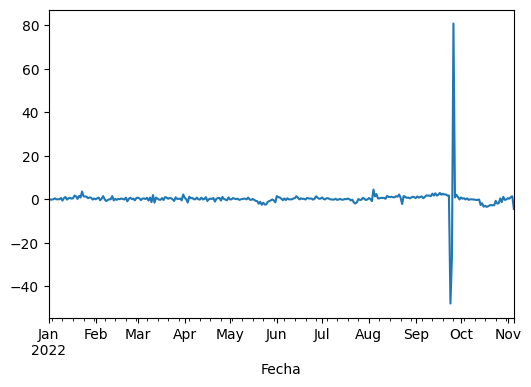

In [3]:
daily_mean_ecu = daily_mean.loc['ECU'].diff()
daily_mean_ecu_2021 = daily_mean_ecu[daily_mean_ecu.index < '2022']
daily_mean_ecu_2022 = daily_mean_ecu[daily_mean_ecu.index >= '2022']
daily_mean_ecu_2021.Oferta.plot(figsize=(6, 4))
plt.show()
daily_mean_ecu_2022.Oferta.plot(figsize=(6, 4))
plt.show()

#### Visualizemos la diferencia de la media diaria para el USD antes y durante del 2022

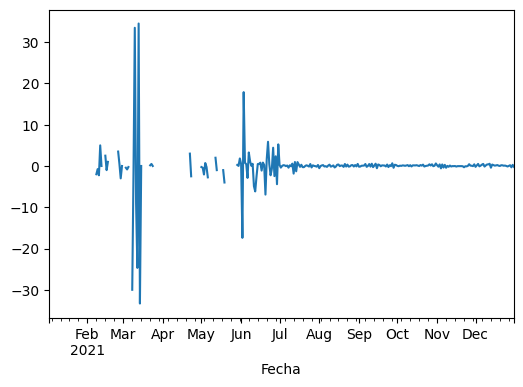

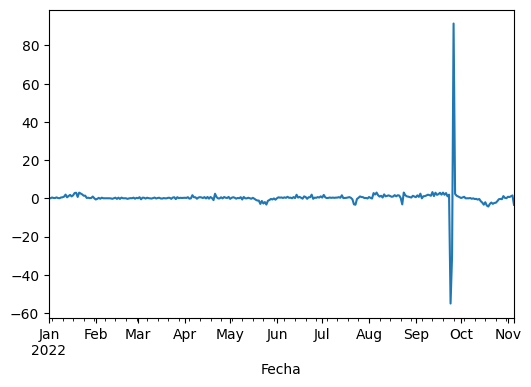

In [4]:
daily_mean_usd = daily_mean.loc['USD'].diff()
daily_mean_usd_2021 = daily_mean_usd[daily_mean_usd.index < '2022']
daily_mean_usd_2022 = daily_mean_usd[daily_mean_usd.index >= '2022']
daily_mean_usd_2021.Oferta.plot(figsize=(6, 4))
plt.show()
daily_mean_usd_2022.Oferta.plot(figsize=(6, 4))
plt.show()

#### Visualizemos la diferencia de la media diaria para el MLC antes y durante del 2022

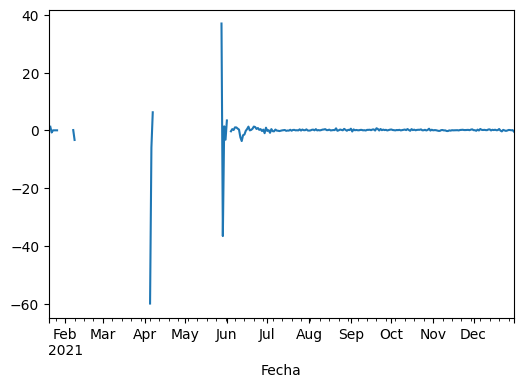

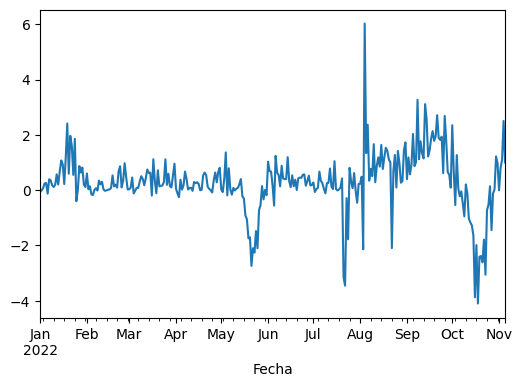

In [5]:
daily_mean_mlc = daily_mean.loc['MLC'].diff()
daily_mean_mlc_2021 = daily_mean_mlc[daily_mean_mlc.index < '2022']
daily_mean_mlc_2022 = daily_mean_mlc[daily_mean_mlc.index >= '2022']
daily_mean_mlc_2021.Oferta.plot(figsize=(6, 4))
plt.show()
daily_mean_mlc_2022.Oferta.plot(figsize=(6, 4))
plt.show()

### Análisis visual

Los datos muestran tres aspectos importantes:

    1. Antes de Julio del 2021 muchos valores están ausentes.
    2. En Septiembre 2022 ocurre una anomalía que produce un descenso y aumento de la media de los valores en pocos días.  

Considerando lo anterior, la cantidad de valores ausentes antes de Julio 2021 va imposibilitar hacer un análisis antes y después de la tasa de referencia de ET. Además, si incluimos la anomalía de a finales de Septiembre cualquier análisis estadístico que hagamos dará como resultado un cambio de la distribution de los valores. 

### Metodología

Centramos el análisis en los datos recolectados entre Agosto, 2021 y Agosto, 2022. En ese período, analizamos la distribución de VDP en busqueda de responder si existe, o no, un cambio significativo de la variación de los datos. Analizar solamente este periodo es intuitivo. Creemos que si la tasa de referencia de ET adquiere mayor popularidad en el 2022, entonces de haber influenciado el mercado, lo tuvo que hacer a partir del 2022. Empezamos el análisis enfocados a la moneda USD visualizando los datos de nuevo en ese período.


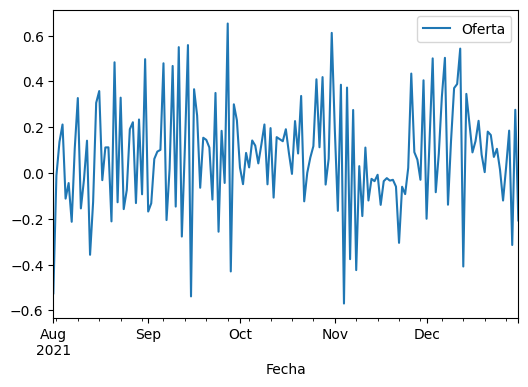

<AxesSubplot: xlabel='Fecha'>

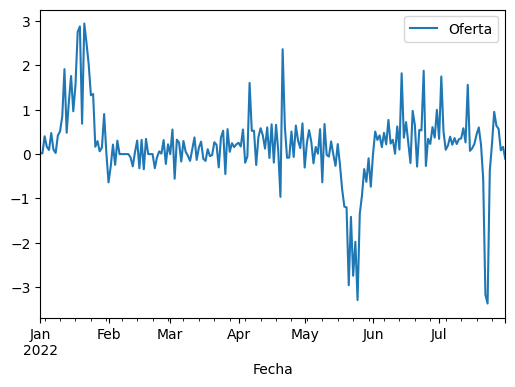

In [6]:
daily_mean_usd_2021 = daily_mean_usd_2021[daily_mean_usd_2021.index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_mean_usd_2022 = daily_mean_usd_2022[daily_mean_usd_2022.index <= pd.to_datetime('31/7/2022', dayfirst=True)]
daily_mean_usd_2021.plot(figsize=(6, 4))
plt.show()
daily_mean_usd_2022.plot(figsize=(6, 4))

Lo primero que apreciamos es un ligero cambio de la distribution. En el 2021 los valores esta más cercanos a 0, mientras que en el 2022 se nota una mayor desviación. Por ejemplo, en Enero existe un incremento significativo de la tasa de cambio, mientras que a finales de Mayo notamos un descenso. Sin embargo, en ambos casos, la media parece ser menor de 1 lo cual indica que el índice de crecimiento es menor de un peso por día en el 2021 y el 2022. Veamos como se comporta el coeficiente de variación. 

## 1. Análisis del coeficiente de variación.

El coeficiente de variación (desviación estándar relativa) es una medida estadística de la dispersión de puntos de datos alrededor de la media. La métrica se usa comúnmente para comparar la dispersión de datos entre distintas series de datos. A diferencia de la desviación estándar que siempre debe considerarse en el contexto de la media de los datos, el coeficiente de variación proporciona una herramienta relativamente simple y rápida para comparar diferentes series de datos. Matemáticamente, la fórmula estándar para el coeficiente de variación se expresa de la siguiente manera $cv = \sigma/\mu*100$, donde $\sigma$ es la desviación estandard y $\mu$ es la media. 

**Hipótesis:** El coeficiente de variación de VDP antes del 2022 es igual al coeficiente de variación actual. 

In [7]:
print('2021 desviación estandard:', np.round(daily_mean_usd_2021.std().values[0], 2))
print('2021 valor medio:', np.round(daily_mean_usd_2021.mean().values[0], 2))
print('2022 desviación estandard:', np.round(daily_mean_usd_2022.std().values[0], 2))
print('2022 valor medio:', np.round(daily_mean_usd_2022.mean().values[0], 2))

cv = lambda x: np.std(x) / np.mean(x) 

print('Coeficiente de Variación 2021:', np.round(cv(daily_mean_usd_2021).values[0], 2))
print('Coeficiente de Variación 2022: ', np.round(cv(daily_mean_usd_2022).values[0], 2))

2021 desviación estandard: 0.24
2021 valor medio: 0.07
2022 desviación estandard: 0.84
2022 valor medio: 0.19
Coeficiente de Variación 2021: 3.25
Coeficiente de Variación 2022:  4.33


/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Los resultados indican que existe un cambio en el coeficiente de variación de ambos periodos de tiempo. Específicamente, el año 2022 tiene un mayor coeficiente de variación que significa mayor dispersión de los datos. Eso no significa que los datos son completamente diferentes, simplemente que por algún motivo existe mayor variación en el 2022 comparado al 2021. Esto puede deberse a varios motivos, por ejemplo, diferentes acontecimientos en el país pudieron influenciar la tasa durante el 2022. Una observación notable es que los valores de la media ahora son un poco más elevados, lo cual indica mayor crecimiento diario de la tasa de representativa con respecto al año 2022. Puede ser interesante comparar la tasa de crecimiento con los meses Octubre y Noviembre para descubrir si la media sigue una tendencia positiva. 

El coeficiente de variación no es suficiente evidencia para determinar si ET influyó en la tasa representativa. Para investigar más en detalles, a continuación aplicamos la **prueba de hipótesis de Kolmogorov-Smirnov (KS)**.

## 2. Prueba de hipótesis de Kolmogorov-Smirnov (KS).

La prueba KS es una prueba no paramétrica y sin distribución, i.e., no hace suposiciones sobre la distribución de los datos. KS se puede utilizar para comparar si dos muestras (D1 y D2) de distribuciones univariadas pertenezen a la misma distribución de probabilidad (hipótesis nula) o no (hipótesis alternativa).

**Hipótesis Nula:** La distribución de VDP es la misma antes del 2022 y durante.

**Hipótesis Nula:** La distribución de VDP es diferente antes del 2022 y durante.

Los datos del 2021 no se distribuyen normalmente (campana de Gauss) 
Los datos del 2022 no se distribuyen normalmente (campana de Gauss) 
Los datos no se distribuyen de la misma forma. Pvalue= 1.9e-05


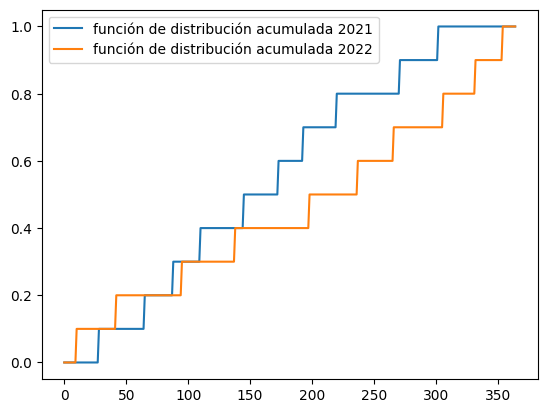

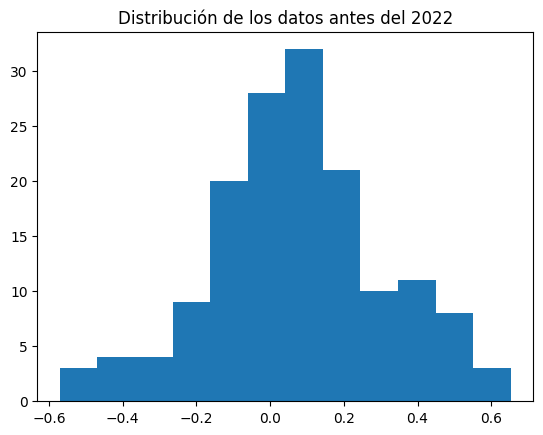

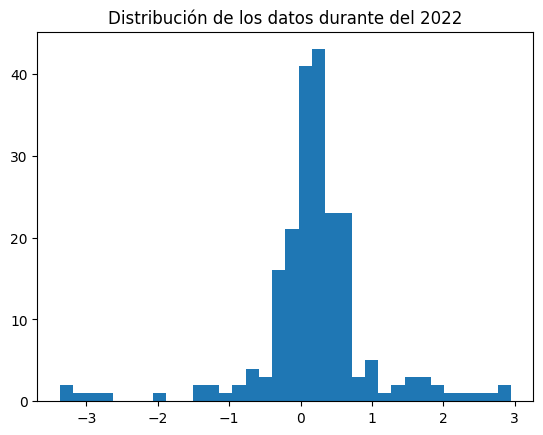

In [8]:
from scipy import stats as st
from scipy.stats import ks_2samp
from scipy.stats import kstest

def cdf(data, sample_conc):
    return [np.round(st.percentileofscore(data, value)/100, 1) for value in sample_conc]

def critical_diff(D1, D2):
    return 1.36*np.sqrt(len(D1)**-1 + len(D2)**-1) # 95% confidence interval

def detect_drift(D1, D2) -> bool:
    samp_concat = np.sort(np.concatenate((D1, D2)))
    samp_a_cdf = cdf(D1, samp_concat)
    samp_b_cdf = cdf(D2, samp_concat)
    plt.plot(samp_a_cdf, label='función de distribución acumulada 2021')
    plt.plot(samp_b_cdf, label='función de distribución acumulada 2022')
    plt.legend()
    #compute absolute difference
    samp_diff = np.abs(np.subtract(samp_a_cdf, samp_b_cdf))
    drift = max(samp_diff) > critical_diff(D1, D2)
    drift_detected = True if drift > critical_diff(D1, D2) else False
    plt.show()
    return drift_detected

#perform Kolmogorov-Smirnov test
_, pvalue = kstest(daily_mean_usd_2021.Oferta.values, 'norm')

if pvalue < 0.05:
    print("Los datos del 2021 no se distribuyen normalmente (campana de Gauss) ")
else:
    print("Los datos del 2021 se distribuyen normalmente (campana de Gauss)  ")

_, pvalue = kstest(daily_mean_usd_2022.Oferta.values, 'norm')

if pvalue < 0.05:
    print("Los datos del 2022 no se distribuyen normalmente (campana de Gauss) ")
else:
    print("Los datos del 2022 se distribuyen normalmente (campana de Gauss)  ")

_, pvalue = ks_2samp(daily_mean_usd_2021.Oferta.values, daily_mean_usd_2022.Oferta.values)

if pvalue < 0.05:
    print("Los datos no se distribuyen de la misma forma. Pvalue=", np.round(pvalue, 6))
else:
    print("Los datos siguen la misma distribución. Pvalue=", np.round(pvalue, 6))

r = detect_drift(daily_mean_usd_2021.Oferta.values, daily_mean_usd_2022.Oferta.values)

plt.hist(daily_mean_usd_2021.Oferta.values, bins='auto')
plt.title("Distribución de los datos antes del 2022")
plt.show()

plt.hist(daily_mean_usd_2022.Oferta.values, bins='auto')
plt.title("Distribución de los datos durante del 2022")
plt.show()

Como se puede observar, los datos no se distribuyen de la misma forma, o en términos estadísticos, no siguen la misma distribución de probabilidad. El p-valor de la prueba KS es menor a 0.05, por tanto, las distribuciones no son iguales. Como se puede observar, durante el 2022 varias anomalias sucedieron otorgando valores de densidad a valores alejados de la media como -3 y 3. La prueba KS no distingue esas pequeñas perturbaciones en el 2022 y en cambio cae victima de ellos rechanzando la hipótesis nula. Eso nos lleva a nuestro tercer análisis usando el índice de **estabilidad de la población**.

## Análisis del índice de estabilidad de la población (IEP)

El IEP es estadístico de número único ampliamente utilizado que mide cuánto se ha desplazado una variable entre dos distribuciones. Lo hace agrupando las dos distribuciones y comparando los porcentajes de elementos en cada uno de los cubos, lo que da como resultado un solo número que puede usar para comprender qué tan diferentes son las poblaciones. Las interpretaciones comúnmente utilizadas del EIP son:

**PSI < 0,1:** sin cambios significativos

**PSI < 0,2:** cambio moderado

**PSI >= 0.2:** cambio significativo

Calculemos nuestro IEP.

In [9]:
daily_mean_usd_2021['Decile'] = pd.qcut(daily_mean_usd_2021.Oferta, 10, labels=False)
daily_mean_usd_2022['Decile'] = pd.qcut(daily_mean_usd_2022.Oferta, 10, labels=False)

psi_table = pd.DataFrame()
psi_table['dec_21'] = daily_mean_usd_2021.groupby('Decile').count()/daily_mean_usd_2021.shape[0]
psi_table['dec_22'] = daily_mean_usd_2022.groupby('Decile').count()/daily_mean_usd_2022.shape[0]
psi_table['PSI'] = (psi_table['dec_21']-psi_table['dec_22'])*np.log(psi_table['dec_21']/psi_table['dec_22'])
display(psi_table)
print("EL IEP obtenido es", np.round(psi_table.PSI.sum(), 2))

,dec_21,dec_22,PSI
Decile,,,
0,0.104575,0.103774,0.000006
1,0.098039,0.099057,0.000011
2,0.098039,0.127358,0.007671
3,0.098039,0.070755,0.008899
4,0.104575,0.099057,0.000299
5,0.098039,0.099057,0.000011
6,0.098039,0.099057,0.000011
7,0.098039,0.099057,0.000011
8,0.098039,0.099057,0.000011


EL IEP obtenido es 0.02


Note, el IEP obtenido es de 0.02. Esto quiere decir que no ha ocurrido ningún cambio significativo entre las tasas de referencia antes del 2022 y durante. Queda la pregunta, sucede lo mismo con el MLC y el EURO? Hagamos el análisis anterior para esas dos monedas.

## CV, KS and IEP para MLC

Coeficiente de Variación 2021: 1.8
Coeficiente de Variación 2022:  4.18
Los datos no se distribuyen de la misma forma. Pvalue= 2e-06


/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


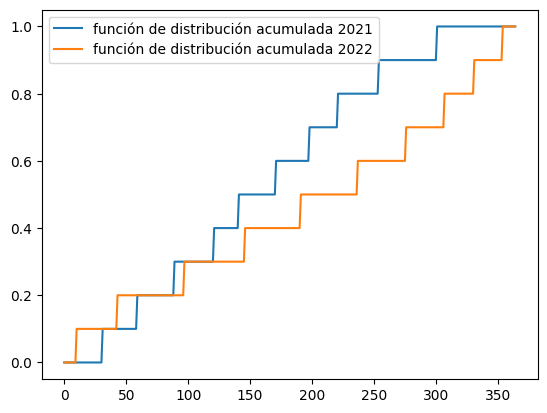

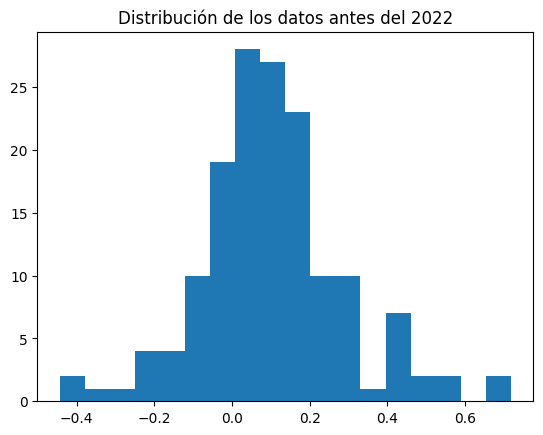

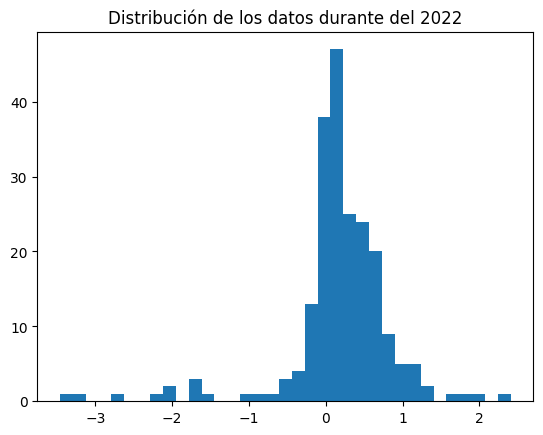

,dec_21,dec_22,PSI
Decile,,,
0,0.104575,0.103774,0.000006
1,0.098039,0.099057,0.000011
2,0.098039,0.099057,0.000011
3,0.098039,0.099057,0.000011
4,0.104575,0.099057,0.000299
5,0.098039,0.099057,0.000011
6,0.098039,0.099057,0.000011
7,0.098039,0.099057,0.000011
8,0.098039,0.099057,0.000011


EL IEP obtenido es 0.0


In [10]:
daily_mean_mlc_2021 = daily_mean_mlc_2021[daily_mean_mlc_2021.index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_mean_mlc_2022 = daily_mean_mlc_2022[daily_mean_mlc_2022.index <= pd.to_datetime('31/7/2022', dayfirst=True)]

print('Coeficiente de Variación 2021:', np.round(cv(daily_mean_mlc_2021).values[0], 2))
print('Coeficiente de Variación 2022: ', np.round(cv(daily_mean_mlc_2022).values[0], 2))


_, pvalue = ks_2samp(daily_mean_mlc_2021.Oferta.values, daily_mean_mlc_2022.Oferta.values)

if pvalue < 0.05:
    print("Los datos no se distribuyen de la misma forma. Pvalue=", np.round(pvalue, 6))
else:
    print("Los datos siguen la misma distribución. Pvalue=", np.round(pvalue, 6))

r = detect_drift(daily_mean_mlc_2021.Oferta.values, daily_mean_mlc_2022.Oferta.values)

plt.hist(daily_mean_mlc_2021.Oferta.values, bins='auto')
plt.title("Distribución de los datos antes del 2022")
plt.show()

plt.hist(daily_mean_mlc_2022.Oferta.values, bins='auto')
plt.title("Distribución de los datos durante del 2022")
plt.show()

daily_mean_mlc_2021['Decile'] = pd.qcut(daily_mean_mlc_2021.Oferta, 10, labels=False)
daily_mean_mlc_2022['Decile'] = pd.qcut(daily_mean_mlc_2022.Oferta, 10, labels=False)

psi_table = pd.DataFrame()
psi_table['dec_21'] = daily_mean_mlc_2021.groupby('Decile').count()/daily_mean_mlc_2021.shape[0]
psi_table['dec_22'] = daily_mean_mlc_2022.groupby('Decile').count()/daily_mean_mlc_2022.shape[0]
psi_table['PSI'] = (psi_table['dec_22']-psi_table['dec_21'])*np.log(psi_table['dec_22']/psi_table['dec_21'])
display(psi_table)
print("EL IEP obtenido es", np.round(psi_table.PSI.sum(), 2))

## CV, KS and IEP para EURO

Coeficiente de Variación 2021: 4.19
Coeficiente de Variación 2022:  5.77
Los datos no se distribuyen de la misma forma. Pvalue= 0.004998


/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


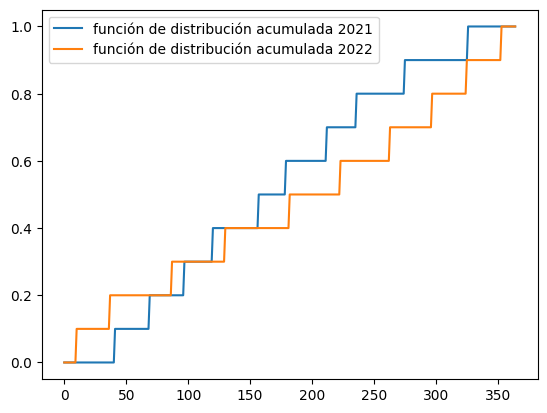

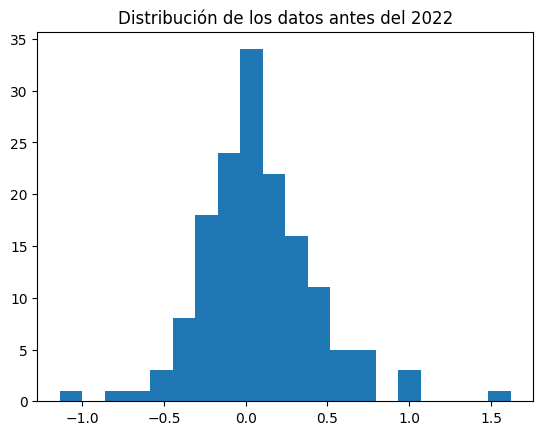

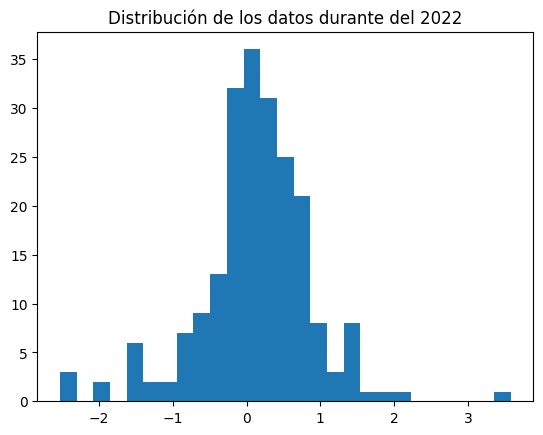

,dec_21,dec_22,PSI
Decile,,,
0,0.104575,0.103774,0.000006
1,0.098039,0.099057,0.000011
2,0.098039,0.099057,0.000011
3,0.098039,0.103774,0.000326
4,0.104575,0.094340,0.001054
5,0.098039,0.099057,0.000011
6,0.098039,0.099057,0.000011
7,0.098039,0.099057,0.000011
8,0.098039,0.099057,0.000011


EL IEP obtenido es 0.0


In [11]:
daily_mean_ecu_2021 = daily_mean_ecu_2021[daily_mean_ecu_2021.index > pd.to_datetime('31/7/2021', dayfirst=True)]
daily_mean_ecu_2022 = daily_mean_ecu_2022[daily_mean_ecu_2022.index <= pd.to_datetime('31/7/2022', dayfirst=True)]

print('Coeficiente de Variación 2021:', np.round(cv(daily_mean_ecu_2021).values[0], 2))
print('Coeficiente de Variación 2022: ', np.round(cv(daily_mean_ecu_2022).values[0], 2))


_, pvalue = ks_2samp(daily_mean_ecu_2021.Oferta.values, daily_mean_ecu_2022.Oferta.values)

if pvalue < 0.05:
    print("Los datos no se distribuyen de la misma forma. Pvalue=", np.round(pvalue, 6))
else:
    print("Los datos siguen la misma distribución. Pvalue=", np.round(pvalue, 6))

r = detect_drift(daily_mean_ecu_2021.Oferta.values, daily_mean_ecu_2022.Oferta.values)

plt.hist(daily_mean_ecu_2021.Oferta.values, bins='auto')
plt.title("Distribución de los datos antes del 2022")
plt.show()

plt.hist(daily_mean_ecu_2022.Oferta.values, bins='auto')
plt.title("Distribución de los datos durante del 2022")
plt.show()

daily_mean_ecu_2021['Decile'] = pd.qcut(daily_mean_ecu_2021.Oferta, 10, labels=False)
daily_mean_ecu_2022['Decile'] = pd.qcut(daily_mean_ecu_2022.Oferta, 10, labels=False)

psi_table = pd.DataFrame()
psi_table['dec_21'] = daily_mean_ecu_2021.groupby('Decile').count()/daily_mean_ecu_2021.shape[0]
psi_table['dec_22'] = daily_mean_ecu_2022.groupby('Decile').count()/daily_mean_ecu_2022.shape[0]
psi_table['PSI'] = (psi_table['dec_22']-psi_table['dec_21'])*np.log(psi_table['dec_22']/psi_table['dec_21'])
display(psi_table)
print("EL IEP obtenido es", np.round(psi_table.PSI.sum(), 2))

### Análisis de los resultados.

Como muestran los resultados, para el MLC y el EURO la tasa de referencia sigue el mismo patrón encontrado anteriormente para el USD. Los coeficientes de variación muestran un aumento de la disperción de los datos, la prueba KS muestra que las distribuciones son distintas y finalmente el IEP muestra que no ha habido ningún cambio significativo. Es notable resaltar que en el caso del EURO el p-value es de solo 0.005. Esto quiere decir que las distribuciones son más cercanas comparado con el USD y el MLC donde el pvalue era mucho menor. Eso también se refleja en el IEP values, en el caso del EURO el valor es prácticamente 0. De todos modos, en la distribución se pueden observer valores alejados de la media cercanos a -3 y 3, evento que en el 2021 no ocurría. 

## Conclusiones y Trabajo Futuro

En este documento hemos hecho un análisis de la distribución de variación diaria promedio de la tasa representativa de ElToque. El análisis ha arrojado la conclusión de que la tasa de referencia no ha variado significativamente con respecto al año 2021 usando el índice de estabilidad de la población. En cambio, la prueba de hipótesis de Kolmogorov-Smirnov muestra un cambio de la distribución. Sin embargo, esto no es evidencia suficiente para afirmar de que la tasa de ET fue la causante del cambio de la distribución. Anomalias durante la primera mitad del año 2022 muestran tener un gran impacto en la prueba KS conduciendolo a rechazar la hipótesis nula. Por otra parte, los coeficientes de variación mostraron differencia con respecto a los dos años. Sobretodo para la modena MLC con mas del double de differencia. 

Como trabajo futuro nos proponemos:

1. Analizar más en profundidad las anomalias ocurridas en el año 2022. El análisis de estas anomalias puede ayudar a entender mejor el resultado de la prueba de KS y los cambios en los coeficientes de variación.

2. Investigar otros métodos estadísticos para determinar si ha ocurrido cambio significativo en la distribución de VDP. Por ejemplo, podemos investigar las pruebas de causalidad de Granger y la de transferencia de Entropía.

3. Analizar si las anomalies se deben a ataques adversarios, errores de extracción del algorithm o simplemente se deben a eventos nacionales reales que afectan la tasa de referencia.

